# Linear Regression

The purpose of this task is to build a simple linear regression model which will model the relationship between an independant and a dependant variable.

## 1.Import and preprocess the dataset

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset
The dataset has been taken from Kaggle and it contains information that can be used for house price prediction. there are 13 columns in this dataset but for this task the variables that are used includes price and area.

In [3]:
df_main=pd.read_csv("Housing.csv")
df = df_main[['price', 'area']]

### Exploratory data analysis

In [4]:
df.head(5)

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   545 non-null    int64
 1   area    545 non-null    int64
dtypes: int64(2)
memory usage: 8.6 KB


In [6]:
df.describe()

,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


In [7]:
df.isnull().sum()

price    0
area     0
dtype: int64

## 2. Split data into train-test sets

## Independent and Dependent Variables
In this module, Independent variable also called as Input variable is denoted by X, and Dependent variable also called as Output variable and is denoted by Y.

In [8]:
#Declare Independant and Dependant variables
X = df['area'].values
Y = df['price'].values

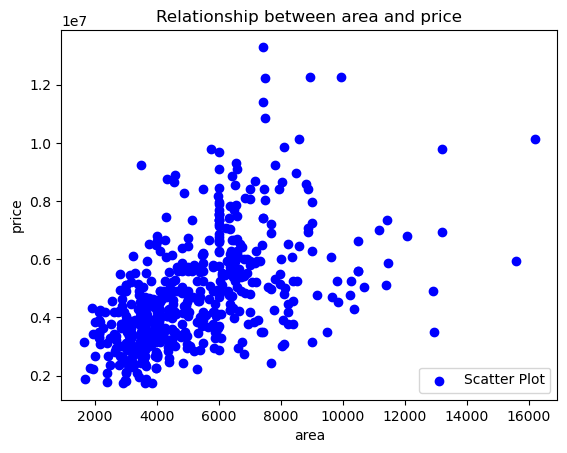

In [10]:
#Scatter plot between X and Y
plt.scatter(X, Y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between area and price')
plt.xlabel('area')
plt.ylabel('price')
plt.legend(loc=4)
plt.show()

In [12]:
print(X.shape)
print(Y.shape)

(545,)
(545,)


In [14]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [15]:
print(X.shape)
print(Y.shape)

(545, 1)
(545, 1)


## Tran-test split

In [20]:
# Split X and Y into training and test data sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [21]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(381, 1)
(381, 1)
(164, 1)
(164, 1)


## 3. Linear regression model 

In [22]:
# Fit the linear model by instantiating the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# Train the model using training data sets
lm.fit(X_train,Y_train)
# Predict on the test data
Y_pred=lm.predict(X_test)

### Estimating model slope and intercept

In [23]:
a=lm.coef_
b=lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b) 

Estimated model slope, a: [[449.44700819]]
Estimated model intercept, b: (array([2457461.52838711]),)


The estimated model slope and intercept values are 449.44700819 and +2457461.52838711.

So, the equation of the fitted regression line is

y = 449.44700819 * x +2457461.52838711

In [24]:
lm.predict(X)[0:5]

array([[5792358.32913754],
       [6484506.72174612],
       [6933953.7299335 ],
       [5828314.08979253],
       [5792358.32913754]])

## 4.Evaluate model 

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 1787173.7251


In [26]:
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(Y_test, Y_pred)))

R2 Score value: 0.2583


## 5.Plot regression line

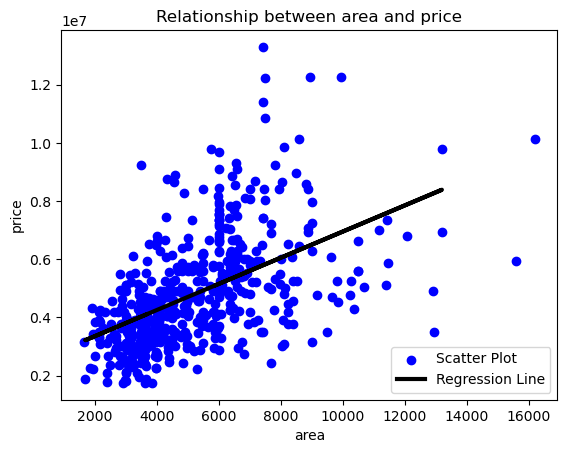

In [28]:
plt.scatter(X, Y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, Y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between area and price')
plt.xlabel('area')
plt.ylabel('price')
plt.legend(loc=4)
plt.show()